Implementation of Naive_bayes algorithm

Import the necessary packages like numpy,pandas,matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load the train and test datasets using pandas package

In [2]:
train=pd.read_csv("trainfsm.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv("test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


check the shape of the both datasets

In [4]:
train.shape,test.shape

((891, 12), (418, 11))

check for null values in the data

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

fill the missing data with standard deviation values

In [7]:
female = train.loc[train['Sex'] == 'female', 'Age'].std()
male = train.loc[train['Sex'] == 'male', 'Age'].std()

# filling missing values in 'Age' column based on gender
train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = female
train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = male
test.loc[(test['Sex'] == 'female') & (test['Age'].isnull()), 'Age'] = female
test.loc[(test['Sex'] == 'male') & (test['Age'].isnull()), 'Age'] = male
test['Fare'] = test['Fare'].fillna(test['Fare'].std())

Now verify the null values

In [8]:
train.isnull().sum(),test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

combine the SibSp(siblings),Parch(parents) columns into family column

In [9]:
train['Family']=train['SibSp']+train['Parch']
del train['SibSp']
del train['Parch']

In [10]:
test['Family']=test['SibSp']+test['Parch']
del test['SibSp']
del test['Parch']


Drop the unwanted columns in the data

In [12]:
train=train.drop(['Ticket','Cabin','Name','PassengerId'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [13]:
test=test.drop(['Ticket','Cabin','Name','PassengerId'],axis=1)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,2


convert the categorical values into integers using LabelEncoder

In [14]:
class LabelEncoder:
    def __init__(self):
        self.mapping = {}
    
    def fit(self, y):
        unique_labels = set(y)
        for i, label in enumerate(unique_labels):
            self.mapping[label] = i
    
    def transform(self, y):
        encoded_labels = []
        for label in y:
            encoded_labels.append(self.mapping[label])
        return encoded_labels
    
    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

In [15]:
label_sex = LabelEncoder()
label_embark = LabelEncoder()
train['Sex'] = label_sex.fit_transform(train['Sex'])
train['Embarked'] = label_embark.fit_transform(train['Embarked'])
test['Sex'] = label_sex.fit_transform(test['Sex'])
test['Embarked'] = label_embark.fit_transform(test['Embarked'])

In [16]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [17]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,34.5,7.8292,1,0
1,3,0,47.0,7.0000,2,1
2,2,1,62.0,9.6875,1,0
3,3,1,27.0,8.6625,2,0
4,3,0,22.0,12.2875,2,2


information of datasets

In [19]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


(None, None)

check the correlation between features

In [20]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
Survived,1.000000,-0.338481,-0.543351,-0.026161,0.257307,-0.163517,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.373436,-0.549500,0.157112,0.065997
Sex,-0.543351,0.131900,1.000000,0.056380,-0.182333,0.104057,-0.200988
Age,-0.026161,-0.373436,0.056380,1.000000,0.125214,0.045377,-0.205321
Fare,0.257307,-0.549500,-0.182333,0.125214,1.000000,-0.221226,0.217138
Embarked,-0.163517,0.157112,0.104057,0.045377,-0.221226,1.000000,0.064701
Family,0.016639,0.065997,-0.200988,-0.205321,0.217138,0.064701,1.000000


In [21]:
test.corr()

,Pclass,Sex,Age,Fare,Embarked,Family
Pclass,1.000000,0.108615,-0.521052,-0.575768,0.227983,0.012736
Sex,0.108615,1.000000,-0.031223,-0.190695,0.076281,-0.161803
Age,-0.521052,-0.031223,1.000000,0.378330,-0.101843,-0.045682
Fare,-0.575768,-0.190695,0.378330,1.000000,-0.256381,0.249312
Embarked,0.227983,0.076281,-0.101843,-0.256381,1.000000,0.066376
Family,0.012736,-0.161803,-0.045682,0.249312,0.066376,1.000000


now seperate the Survived Column(target variable) from train dataset

In [22]:
y = train['Survived']
del train['Survived']

split the train dataset into train and test

In [23]:
def train_test_split(data, target, test_size=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    
    split_index = int(len(data) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    train_data = data.iloc[train_indices]
    test_data = data.iloc[test_indices]
    train_target = target.iloc[train_indices]
    test_target = target.iloc[test_indices]
    
    return train_data, test_data, train_target, test_target


In [24]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_seed=42)

create the naive_bayes model

In [25]:
class NaiveBayes:
    def __init__(self):
        self.prior = {}
        self.conditional = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)

        for c in self.classes:
            self.prior[c] = np.mean(y == c)

            X_c = X[y == c]
            self.conditional[c] = {}
            for feature in X.columns:
                self.conditional[c][feature] = {
                    'mean': np.mean(X_c[feature]),
                    'std': np.std(X_c[feature])
                }

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            posterior = {}
            for c in self.classes:
                likelihood = 1
                for feature in X.columns:
                    mean = self.conditional[c][feature]['mean']
                    std = self.conditional[c][feature]['std']
                    x = row[feature]
                    likelihood *= self.calculate_likelihood(x, mean, std)
                posterior[c] = likelihood * self.prior[c]
            prediction = max(posterior, key=posterior.get)
            predictions.append(prediction)
        return predictions

    def calculate_likelihood(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        likelihood = (1 / (np.sqrt(2 * np.pi) * std)) * exponent
        return likelihood


In [26]:
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train) # fitting values
predictions = naive_bayes.predict(x_test) #prediction of test date

calculation of acccuracy_score

In [27]:
y_test=np.array(y_test) #converting into array data
predictions=np.array(predictions) #converting into array data

In [28]:
def accuracy_score(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1

    accuracy = correct / total
    return accuracy


accuracy = accuracy_score(y_test, predictions) * 100
print("Accuracy:", accuracy)

Accuracy: 79.3296089385475


In [29]:
naive_bayes = NaiveBayes()
naive_bayes.fit(train, y) # fitting values
predictions = naive_bayes.predict(test) #prediction of test date

In [30]:
data=pd.read_csv("gender_submission.csv")
data=data.drop(["PassengerId"],axis=1)
data.head()


,Survived
0,0
1,1
2,0
3,0
4,1


calculation of accuracy_score for test data and final validation dataset

In [31]:
data=np.array(data) #converting into array data
predictions=np.array(predictions) #converting into array data

In [32]:
def accuracy_score(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1

    accuracy = correct / total
    return accuracy

accuracy = accuracy_score(data, predictions) * 100
print("Accuracy:", accuracy)

Accuracy: 89.71291866028707


confusion matrix representation

In [33]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(classes)
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for i in range(len(y_true)):
        true_label = np.where(classes == y_true[i])[0][0]
        pred_label = np.where(classes == y_pred[i])[0][0]
        matrix[true_label][pred_label] += 1
    
    return matrix

y_true = np.array(data).ravel() #converting into array data
y_pred = np.array(predictions).ravel() #converting into array data

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[231  35]
 [  8 144]]


plotting between y_test and prediction values

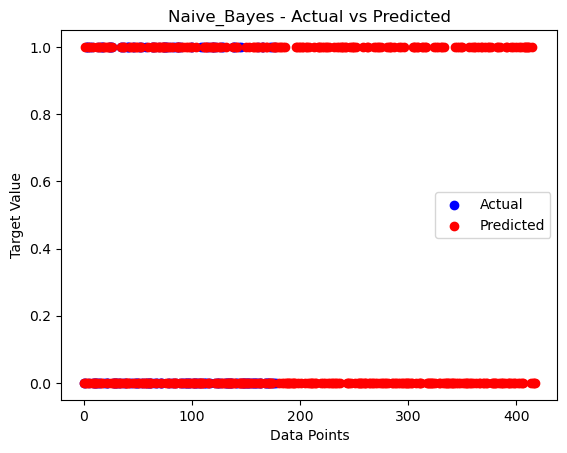

In [34]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Value')
plt.title('Naive_Bayes - Actual vs Predicted')
plt.legend()
plt.show()

plotting between validation data and prediction values

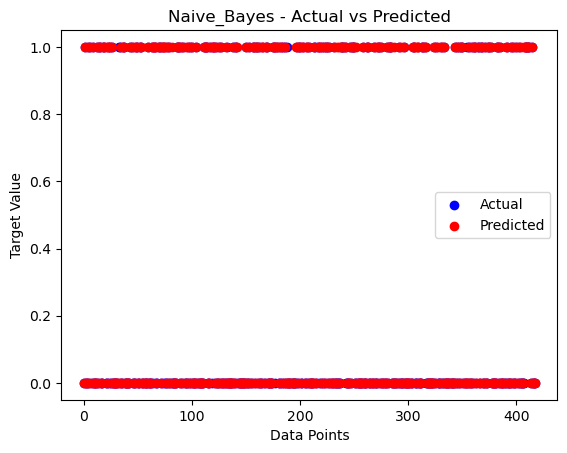

In [35]:
plt.scatter(range(len(data)), data, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Value')
plt.title('Naive_Bayes - Actual vs Predicted')
plt.legend()
plt.show()